In [104]:
import networkx as nx
import osmnx as ox
import fiona
import math

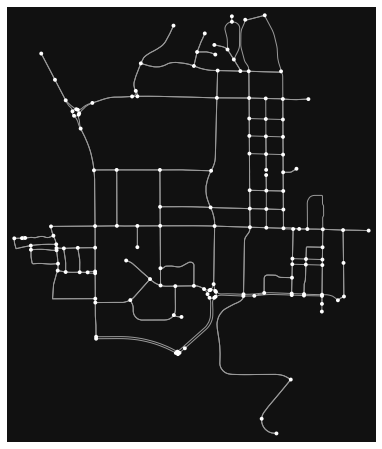

In [28]:
G = ox.graph_from_place("Purdue University,West Lafayette, Indiana, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

In [36]:
place = "Purdue University,West Lafayette, Indiana"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(427, 62)

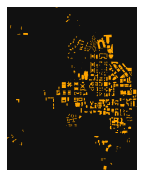

In [37]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [33]:
ox.save_graphml(G, filepath="./mynetwork.graphml")

In [18]:
import json

In [74]:
cc = json.loads(gdf.to_json())
with open("sample_2.json", "w") as outfile:
     json_object = json.dump(cc, outfile, indent=4, sort_keys=True)
 

In [76]:
f = open("sample_2.json")

cx_try = json.load(f)

/tmp/ipykernel_74825/675672428.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='sample_2.json' mode='r' encoding='UTF-8'>
  f = open("sample_2.json")


In [77]:
type(cx_try)

dict

In [95]:
cx_try["features"][5]['geometry']['coordinates'][0][0]

[-86.9163514, 40.4337315]

In [101]:
new_json = []
for build_obj in cx_try["features"]:
    new_obj = {}
    if build_obj['geometry']['type'] == 'Point':
        new_obj['coordinates'] = build_obj['geometry']['coordinates']
    else:
        new_obj['coordinates'] = build_obj['geometry']['coordinates'][0][0]
    
    new_obj['building'] = build_obj['properties']['building']
    new_obj['name'] =build_obj['properties']['name']
    new_json.append(new_obj)

In [102]:
new_json

[{'coordinates': [-86.9161928, 40.4198167],
  'building': 'university',
  'name': 'Veterinary Pathobiology Research Building'},
 {'coordinates': [-86.9160409, 40.4192381],
  'building': 'university',
  'name': 'Veterinary Animal Isolation Building 1'},
 {'coordinates': [-86.9215549, 40.4263298],
  'building': 'dormitory',
  'name': 'Wood (Elizabeth G. and William R.) Residence Hall'},
 {'coordinates': [-86.9209039, 40.4270504],
  'building': 'dormitory',
  'name': 'Vawter (Everett B.) Residence Hall'},
 {'coordinates': [-86.9205502, 40.4265483],
  'building': 'dormitory',
  'name': 'Warren (Martha E. and Eugene K.) Residence Hall'},
 {'coordinates': [-86.9163514, 40.4337315],
  'building': 'yes',
  'name': 'Mackey Arena'},
 {'coordinates': [-86.9149266, 40.428271],
  'building': 'university',
  'name': 'Elliott Hall of Music (ELLT)'},
 {'coordinates': [-86.9132656, 40.4300359],
  'building': 'university',
  'name': 'Physics Building (PHYS)'},
 {'coordinates': [-86.9171681, 40.4327668],

In [103]:
edges = {}
with open('edge.txt') as file:
    edge = {}
    for line in file:
        if 'tid' in line:
            edge['tid'] = int(line.split(': ')[1].strip())
        elif 'source_coords' in line:
            edge['source_coords'] = tuple(map(float, line.split(': ')[1].strip().split(',')))
        elif 'target_coords' in line:
            edge['target_coords'] = tuple(map(float, line.split(': ')[1].strip().split(',')))
        elif '---next---' in line:
            edges[edge['tid']] = {'source_coords': edge['source_coords'], 'target_coords': edge['target_coords']}
            edge = {}

print(edges)

{0: {'source_coords': (-122.4027912, 37.7928594), 'target_coords': (-122.4044255, 37.7926558)}, 1: {'source_coords': (-122.4027912, 37.7928594), 'target_coords': (-122.4025983, 37.791909)}, 2: {'source_coords': (-122.4044255, 37.7926558), 'target_coords': (-122.4046141, 37.7935779)}, 3: {'source_coords': (-122.4044255, 37.7926558), 'target_coords': (-122.4059535, 37.7924582)}, 4: {'source_coords': (-122.4044255, 37.7926558), 'target_coords': (-122.4027912, 37.7928594)}, 5: {'source_coords': (-122.4025983, 37.791909), 'target_coords': (-122.4042334, 37.7917031)}, 6: {'source_coords': (-122.4025983, 37.791909), 'target_coords': (-122.4024099, 37.7909791)}, 7: {'source_coords': (-122.4046141, 37.7935779), 'target_coords': (-122.4061403, 37.7933866)}, 8: {'source_coords': (-122.4046141, 37.7935779), 'target_coords': (-122.4047926, 37.7944619)}, 9: {'source_coords': (-122.4059535, 37.7924582), 'target_coords': (-122.4061403, 37.7933866)}, 10: {'source_coords': (-122.4059535, 37.7924582), 't